# Anomaly Detection using K-Means Clustering (Scikit-Learn)

In [1]:
'''
#Author:  Thai Nguyen

#Data Type:  Networks connections for IDS.  
#Data Source:  http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
#Description:   Use k-means to cluster data points.  
                When a new data point comes, its distance is measured to
                its nearest centroid. If this distance exceeds some
                threshold, it is anomalous.
              
#Status:  Work in progress.  Codes not optimized, just experimenting
        
'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
#pwd

In [3]:
#ls

In [4]:
#ls data

In [2]:
ids_data = pd.read_csv('.\data\kddcup.data.corrected',header=None)

In [3]:
#Get the dimensions
ids_data.shape

(4898431, 42)

In [4]:
#Get Column names
list(ids_data.columns)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41]

In [5]:
ids_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,238,1282,0,0,0,0,...,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,235,1337,0,0,0,0,...,6,1.0,0.0,0.17,0.0,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,234,1364,0,0,0,0,...,7,1.0,0.0,0.14,0.0,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,239,1295,0,0,0,0,...,8,1.0,0.0,0.12,0.0,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
#Our data consist of 4 non-numeric columns, and 38 numeric columns.  Columns 5, 8, 9 have continuous data.

In [6]:
ids_data.groupby(41)[41].count().sort_values(ascending=False)


41
smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: 41, dtype: int64

In [7]:
#Quickly view numeric features reduced to 2D for visualization using PCAplt.  
numeric_data = ids_data.select_dtypes(include=['number'])
numeric_data.shape


(4898431, 38)

In [8]:
numeric_data.count()

0     4898431
4     4898431
5     4898431
6     4898431
7     4898431
8     4898431
9     4898431
10    4898431
11    4898431
12    4898431
13    4898431
14    4898431
15    4898431
16    4898431
17    4898431
18    4898431
19    4898431
20    4898431
21    4898431
22    4898431
23    4898431
24    4898431
25    4898431
26    4898431
27    4898431
28    4898431
29    4898431
30    4898431
31    4898431
32    4898431
33    4898431
34    4898431
35    4898431
36    4898431
37    4898431
38    4898431
39    4898431
40    4898431
dtype: int64

In [9]:
#use sklearn scaler to normalize data as column 4 and 5 has a wider range.  
#The default use mean and unit standard deviation scaling
from sklearn.preprocessing import StandardScaler
scaler_normalized = StandardScaler().fit_transform(numeric_data)

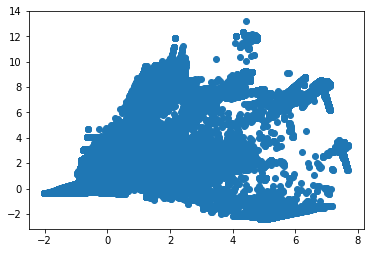

In [10]:
PCA_reduced2 = PCA(n_components=2).fit_transform(scaler_normalized)

plt.scatter(PCA_reduced2[:, 0], PCA_reduced2[:, 1])


In [11]:
PCA_reduced2.shape

(4898431, 2)

In [12]:
K=np.arange(5, 30, 5)

#K=np.arange(1, 3)
from scipy.spatial.distance import cdist

meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaler_normalized)
    meandistortions.append(sum(np.min(cdist(scaler_normalized, kmeans.cluster_centers_, 'euclidean'), axis=1)) / 
                           scaler_normalized.shape[0])
    print(k)
 


5
10
15
20
25


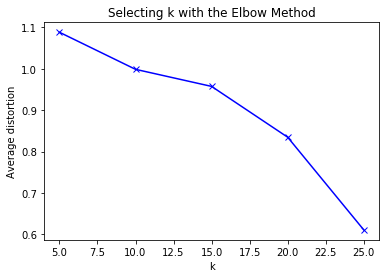

In [13]:
 
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
#plt.show()

In [ ]:
#Conclusions/Further Analysis:
#As number of cluster increases, the average distance error reduces.  
#Python/Scikit-learn is slow on k-means on a PC.  
#To find the optimal k (Elbow), will need to run on bigger k, and to parallel processing 
#using distributed computing such as Apache Spark or more processing using GPU.

#Also evaluate clustering:  epsilon, different random initialization, include categorical columns, 
#and other measurements (Gini, entropy) - Include categorical data to check if each data points in a cluster has the same label.
#Should be looking for low entropy and low Gini as K increases

#Or use Silhouette coefficient to choose K without using labeled data.

#To detect anomaly using K-Means, incoming data can be measured by calculating its distance with its nearest centroids. 
#If this distance exceeds some threshold, it is anomalous.  ie. threshold can be the number of datapoints furthest from
#centroid (outliers).

#Other models to consider:  Time Series, Multivariate Guassian Distritribution, Reinforcement Learning.

